In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Task 2a
df_trade = pd.read_csv("OECD_Trade.csv", parse_dates =['Time', 'TIME'])
df_gdp = pd.read_csv("OECD_GDP.csv", parse_dates = ['TIME'])


In [3]:
df_trade

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011-01-01,2011-01-01,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012-01-01,2012-01-01,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013-01-01,2013-01-01,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014-01-01,2014-01-01,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015-01-01,2015-01-01,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29217,EU28,European Union (28 countries),IMP,Imports,ZAF,South Africa,A,Annual,2013-01-01,2013-01-01,USD,US Dollar,0,Units,NaN,NaN,19137617125,NaN,NaN
29218,EU28,European Union (28 countries),IMP,Imports,ZAF,South Africa,A,Annual,2014-01-01,2014-01-01,USD,US Dollar,0,Units,NaN,NaN,23695105589,NaN,NaN
29219,EU28,European Union (28 countries),IMP,Imports,ZAF,South Africa,A,Annual,2015-01-01,2015-01-01,USD,US Dollar,0,Units,NaN,NaN,20731755074,NaN,NaN
29220,EU28,European Union (28 countries),IMP,Imports,ZAF,South Africa,A,Annual,2016-01-01,2016-01-01,USD,US Dollar,0,Units,NaN,NaN,27344714134,NaN,NaN


In [4]:
#Task 1 (drop all redundant columns)
exports_imports = df_trade[['Reporter country', 'Value', 'TIME', 'Flow']]  

In [5]:
exports_imports

,Reporter country,Value,TIME,Flow
0,Australia,73144918,2011-01-01,Exports
1,Australia,71483059,2012-01-01,Exports
2,Australia,67897422,2013-01-01,Exports
3,Australia,61114752,2014-01-01,Exports
4,Australia,54730242,2015-01-01,Exports
...,...,...,...,...
29217,European Union (28 countries),19137617125,2013-01-01,Imports
29218,European Union (28 countries),23695105589,2014-01-01,Imports
29219,European Union (28 countries),20731755074,2015-01-01,Imports
29220,European Union (28 countries),27344714134,2016-01-01,Imports


In [6]:
exp_imp = exports_imports.groupby(["TIME", "Flow"])

In [7]:
totals = exp_imp.sum()

In [8]:
totals = totals.unstack()
totals

Value                
Flow               Exports         Imports
TIME                                      
2010-01-01  20634201324664  22505199774166
2011-01-01  24929636616993  26243779294417
2012-01-01  24156907569088  26107548592708
2013-01-01  25509829075856  26412679756121
2014-01-01  25545292755726  27376929764372
2015-01-01  23912678214855  25136867579022
2016-01-01  23655034950911  24389885094067
2017-01-01  22152875088532  24266686960221
2018-01-01  17979256858277  21327638468782

Text(0.5, 1.0, 'Total Worldwide Exports & Imports')

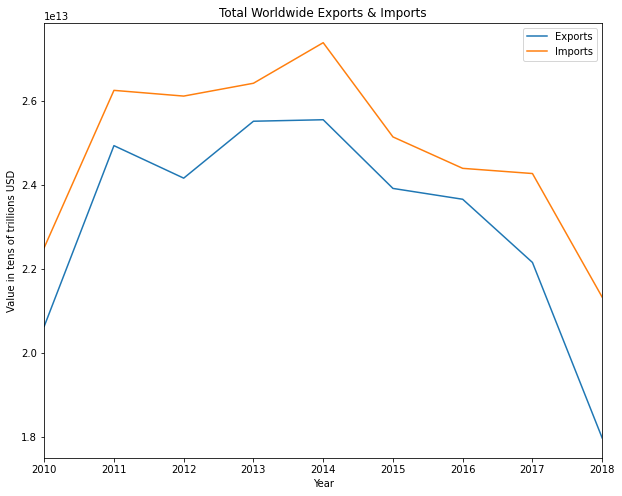

In [9]:
myplot = totals.plot(figsize= (10,8))
myplot.legend(['Exports', 'Imports'], loc = 'best')
myplot.set_ylabel('Value in tens of trillions USD')
myplot.set_xlabel('Year')
myplot.set_title("Total Worldwide Exports & Imports")
#b = [18, 20, 22, 24, 26]
#myplot.ticklabel_format(style = '', axis = 'y') #changing scientific notation to plain format. 
#myplot.set_yticks(a, b) 

In [10]:
totals.reset_index(level = [0], inplace = True)

In [11]:
totals

TIME           Value                
Flow                    Exports         Imports
0    2010-01-01  20634201324664  22505199774166
1    2011-01-01  24929636616993  26243779294417
2    2012-01-01  24156907569088  26107548592708
3    2013-01-01  25509829075856  26412679756121
4    2014-01-01  25545292755726  27376929764372
5    2015-01-01  23912678214855  25136867579022
6    2016-01-01  23655034950911  24389885094067
7    2017-01-01  22152875088532  24266686960221
8    2018-01-01  17979256858277  21327638468782

In [12]:
totals['Net Exports'] = totals[('Value','Exports')] - totals[('Value','Imports')]

In [13]:
totals

TIME           Value                    Net Exports
Flow                    Exports         Imports               
0    2010-01-01  20634201324664  22505199774166 -1870998449502
1    2011-01-01  24929636616993  26243779294417 -1314142677424
2    2012-01-01  24156907569088  26107548592708 -1950641023620
3    2013-01-01  25509829075856  26412679756121  -902850680265
4    2014-01-01  25545292755726  27376929764372 -1831637008646
5    2015-01-01  23912678214855  25136867579022 -1224189364167
6    2016-01-01  23655034950911  24389885094067  -734850143156
7    2017-01-01  22152875088532  24266686960221 -2113811871689
8    2018-01-01  17979256858277  21327638468782 -3348381610505

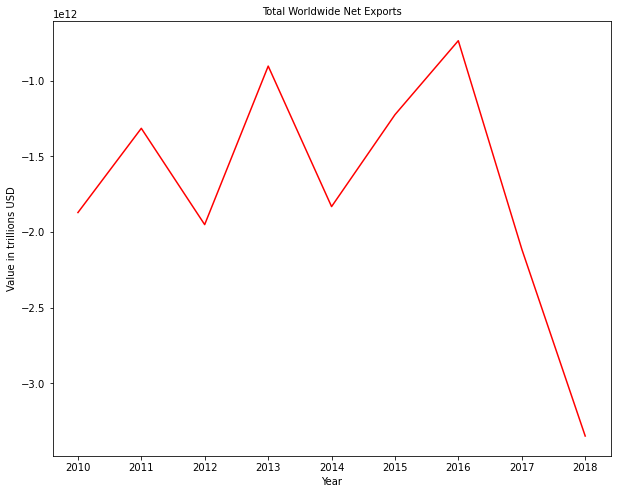

In [14]:
fig , ax = plt.subplots(figsize = (10, 8))

ax.plot(totals['TIME'], totals['Net Exports'], color = 'r')
ax.set_title('Total Worldwide Net Exports', fontsize =10)
ax.set_ylabel('Value in trillions USD', fontsize = 10)
ax.set_xlabel('Year', fontsize = 10)
ax.tick_params(labelsize = 10)

In [15]:

gb_gdp = df_gdp.groupby('TIME')

In [16]:
#group and filter out any unnecessary columns (Task1)
total_gdp = gb_gdp['Value'].sum()

In [17]:
total_gdp = pd.DataFrame(total_gdp)

In [18]:
total_gdp.reset_index(inplace = True)
total_gdp

,TIME,Value
0,2010-01-01,7.412913e+07
1,2011-01-01,8.147871e+07
2,2012-01-01,8.125387e+07
3,2013-01-01,8.371161e+07
4,2014-01-01,8.610551e+07
5,2015-01-01,8.034070e+07
6,2016-01-01,8.176637e+07
7,2017-01-01,8.265844e+07
8,2018-01-01,5.383794e+07


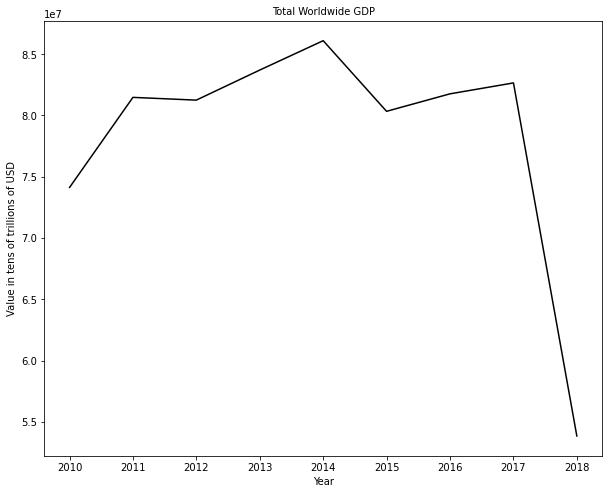

In [19]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(total_gdp['TIME'], total_gdp['Value'], color = 'k')
ax.set_ylabel('Value in tens of trillions of USD', fontsize = 10)
ax.set_xlabel('Year', fontsize =10)
ax.set_title('Total Worldwide GDP', fontsize = 10)
ax.tick_params(labelsize = 10)

,TIME,Value
0,2010-01-01,7.412913e+07
1,2011-01-01,8.147871e+07
2,2012-01-01,8.125387e+07
3,2013-01-01,8.371161e+07
4,2014-01-01,8.610551e+07
5,2015-01-01,8.034070e+07
6,2016-01-01,8.176637e+07
7,2017-01-01,8.265844e+07
8,2018-01-01,5.383794e+07


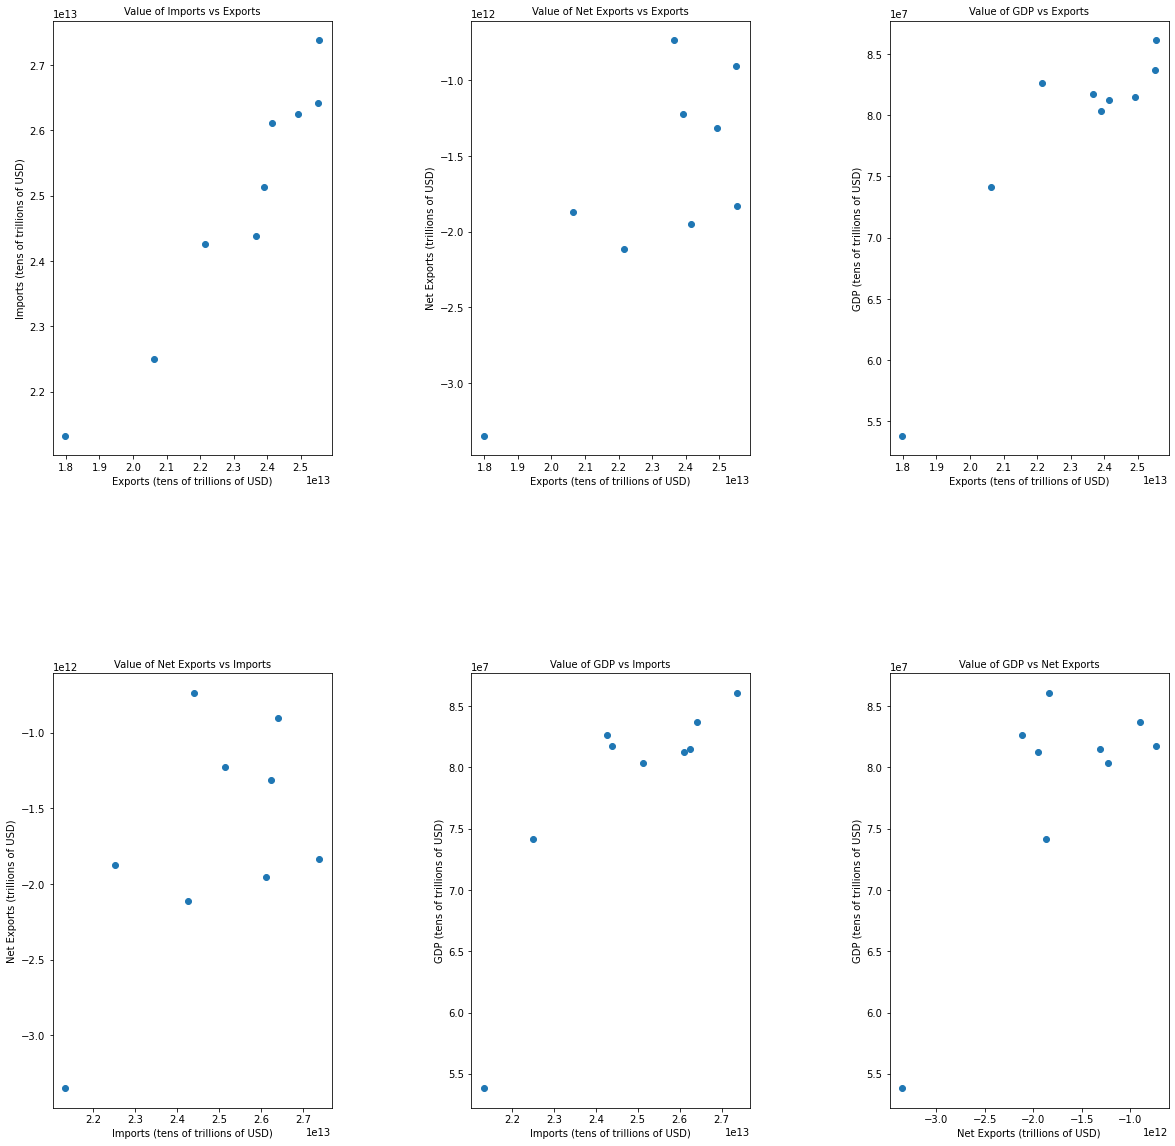

In [20]:
#Task 2b
fig, axs = plt.subplots(2, 3, figsize =(20,20))
axs[0, 0].scatter(totals[('Value','Exports')], totals[('Value','Imports')])
axs[0, 0].set_xlabel("Exports (tens of trillions of USD)", fontsize = 10)
axs[0, 0].set_ylabel("Imports (tens of trillions of USD)", fontsize = 10)
axs[0, 0].set_title("Value of Imports vs Exports", fontsize = 10)
axs[0, 1].scatter(totals[('Value','Exports')], totals['Net Exports'])
axs[0, 1].set_xlabel("Exports (tens of trillions of USD)", fontsize = 10)
axs[0, 1].set_ylabel("Net Exports (trillions of USD)", fontsize = 10)
axs[0, 1].set_title("Value of Net Exports vs Exports", fontsize = 10)
axs[0, 2].scatter(totals[('Value','Exports')], total_gdp['Value'])
axs[0, 2].set_xlabel("Exports (tens of trillions of USD)", fontsize = 10)
axs[0, 2].set_ylabel("GDP (tens of trillions of USD)", fontsize = 10)
axs[0, 2].set_title("Value of GDP vs Exports", fontsize = 10)
axs[1, 0].scatter(totals[('Value','Imports')], totals['Net Exports'])
axs[1, 0].set_xlabel("Imports (tens of trillions of USD)", fontsize = 10)
axs[1, 0].set_ylabel("Net Exports (trillions of USD)", fontsize = 10)
axs[1, 0].set_title("Value of Net Exports vs Imports", fontsize = 10)
axs[1, 1].scatter(totals[('Value','Imports')], total_gdp['Value'])
axs[1, 1].set_xlabel("Imports (tens of trillions of USD)", fontsize = 10)
axs[1, 1].set_ylabel("GDP (tens of trillions of USD)", fontsize = 10)
axs[1, 1].set_title("Value of GDP vs Imports", fontsize = 10)
axs[1, 2].scatter(totals['Net Exports'], total_gdp['Value'])
axs[1, 2].set_xlabel("Net Exports (trillions of USD)", fontsize = 10)
axs[1, 2].set_ylabel("GDP (tens of trillions of USD)", fontsize = 10)
axs[1, 2].set_title("Value of GDP vs Net Exports", fontsize = 10)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
total_gdp

In [21]:
import pandas as pd
import numpy as np 
import datetime as dt
import os
import collections, numpy
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import pylab as pl

In [22]:
#3.0
Main = pd.read_csv("OECD_Trade.csv", encoding = 'ISO-8859-1')
Main.isna().sum()
Main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿"LOCATION"          29222 non-null  object 
 1   Reporter country       29222 non-null  object 
 2   FLOW                   29222 non-null  object 
 3   Flow                   29222 non-null  object 
 4   PARTNER                29222 non-null  object 
 5   Partner country        29222 non-null  object 
 6   FREQUENCY              29222 non-null  object 
 7   Frequency              29222 non-null  object 
 8   TIME                   29222 non-null  int64  
 9   Time                   29222 non-null  int64  
 10  Unit Code              29222 non-null  object 
 11  Unit                   29222 non-null  object 
 12  PowerCode Code         29222 non-null  int64  
 13  PowerCode              29222 non-null  object 
 14  Reference Period Code  0 non-null      float64
 15  Re

In [23]:
Exports = Main[Main["Flow"] ==  "Exports"]
Imports = Main[Main["Flow"] ==  "Imports"]

In [24]:
#3.1
#filter out any unnecessary columns (Task1)
Exp = Exports[["Reporter country", "TIME", "Value"]]
Exp.rename(columns = {"Value": "$_Exports"}, inplace = True)
Pivot1 = Exp.pivot_table(index = "TIME", columns = "Reporter country", aggfunc = "sum")
Pivot1.sum(axis = 1)

TIME
2010    2.063420e+13
2011    2.492964e+13
2012    2.415691e+13
2013    2.550983e+13
2014    2.554529e+13
2015    2.391268e+13
2016    2.365503e+13
2017    2.215288e+13
2018    1.797926e+13
dtype: float64

Text(0.5, 1.0, 'Total annual export for each country for each year')

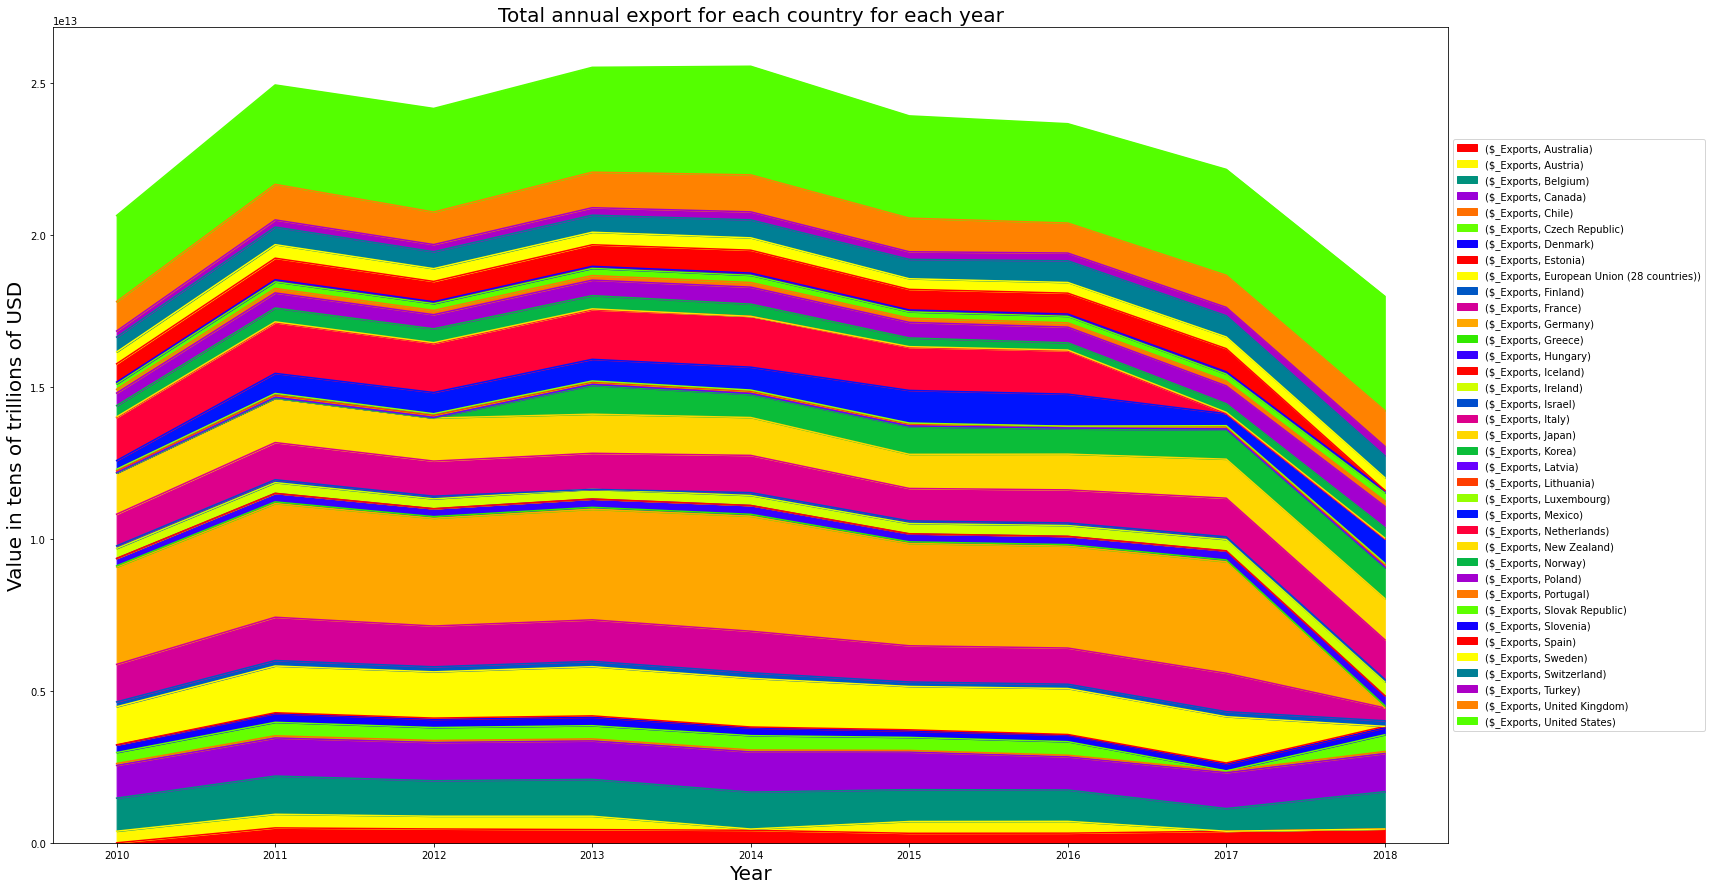

In [25]:
Pivot1.plot(kind = "area", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Value in tens of trillions of USD", fontsize = 20)
plt.title("Total annual export for each country for each year", fontsize = 20)

Text(0.5, 1.0, 'Total annual export for each country for each year')

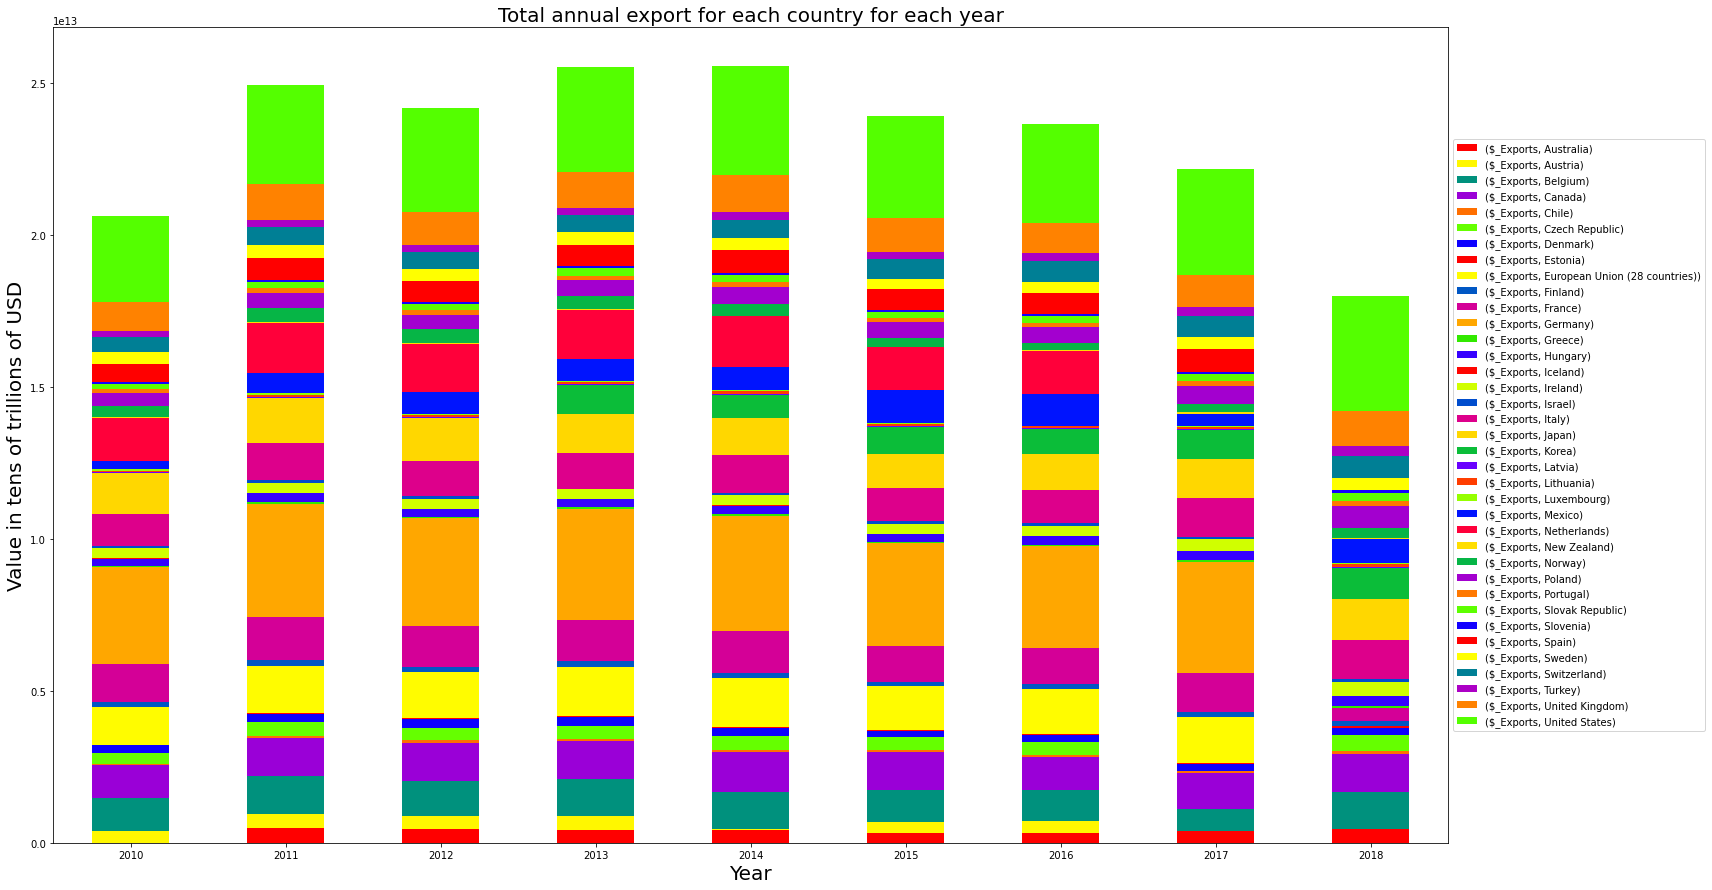

In [26]:
Pivot1.plot(kind = "bar", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Value in tens of trillions of USD", fontsize = 20)
plt.title("Total annual export for each country for each year", fontsize = 20)

In [27]:
Exp1 = Exp.groupby(["Reporter country", "TIME"], as_index = False).sum()
Exp2 = Exp.groupby(["TIME"], as_index = False).sum()
Exp3 = pd.merge(Exp1, Exp2, on = ["TIME"], how = "left")
Exp3["%_Exports"] = 100 * (Exp3["$_Exports_x"] / Exp3["$_Exports_y"])
Exp3 = Exp3[["Reporter country", "TIME", "%_Exports"]]

Text(0.5, 1.0, 'Percentage share of total exports for each country for each year')

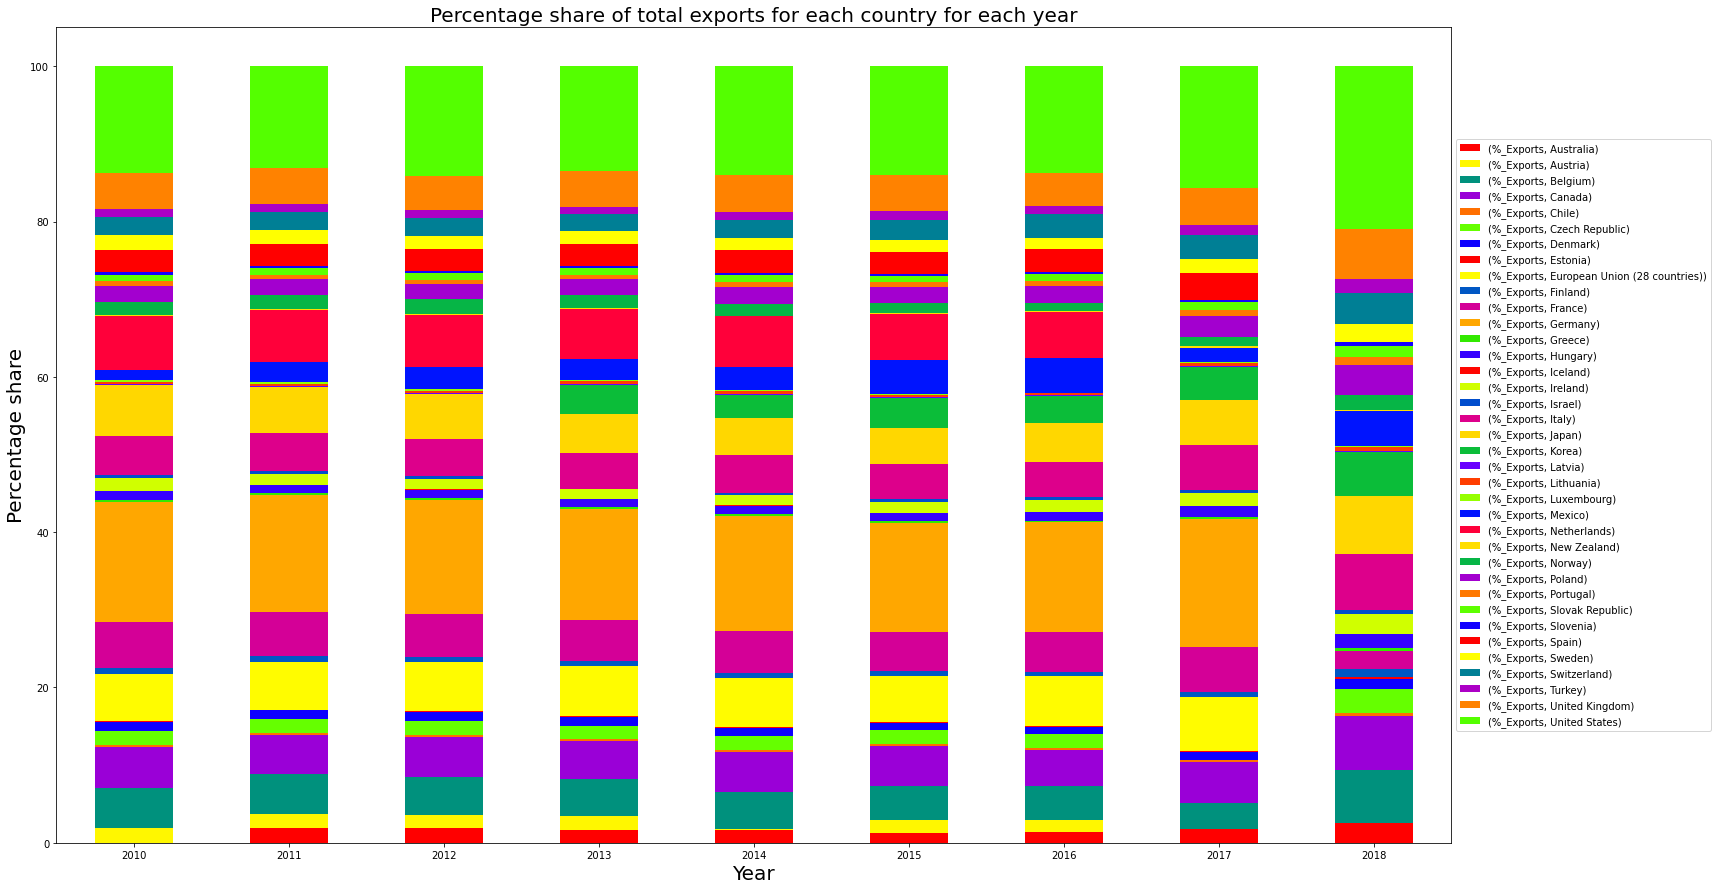

In [28]:
Pivot2 = Exp3.pivot_table(index = "TIME", columns = "Reporter country")
Pivot2.plot(kind = "bar", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage share", fontsize = 20)
plt.title("Percentage share of total exports for each country for each year", fontsize = 20)

In [29]:
#3.2
#filter out any unnecessary columns (Task1)
Imp = Imports[["Reporter country", "TIME", "Value"]]
Imp.rename(columns = {"Value": "$_Imports"}, inplace = True)
Pivot3 = Imp.pivot_table(index = "TIME", columns = "Reporter country", aggfunc = "sum")


Text(0.5, 1.0, 'Total annual import for each country for each year')

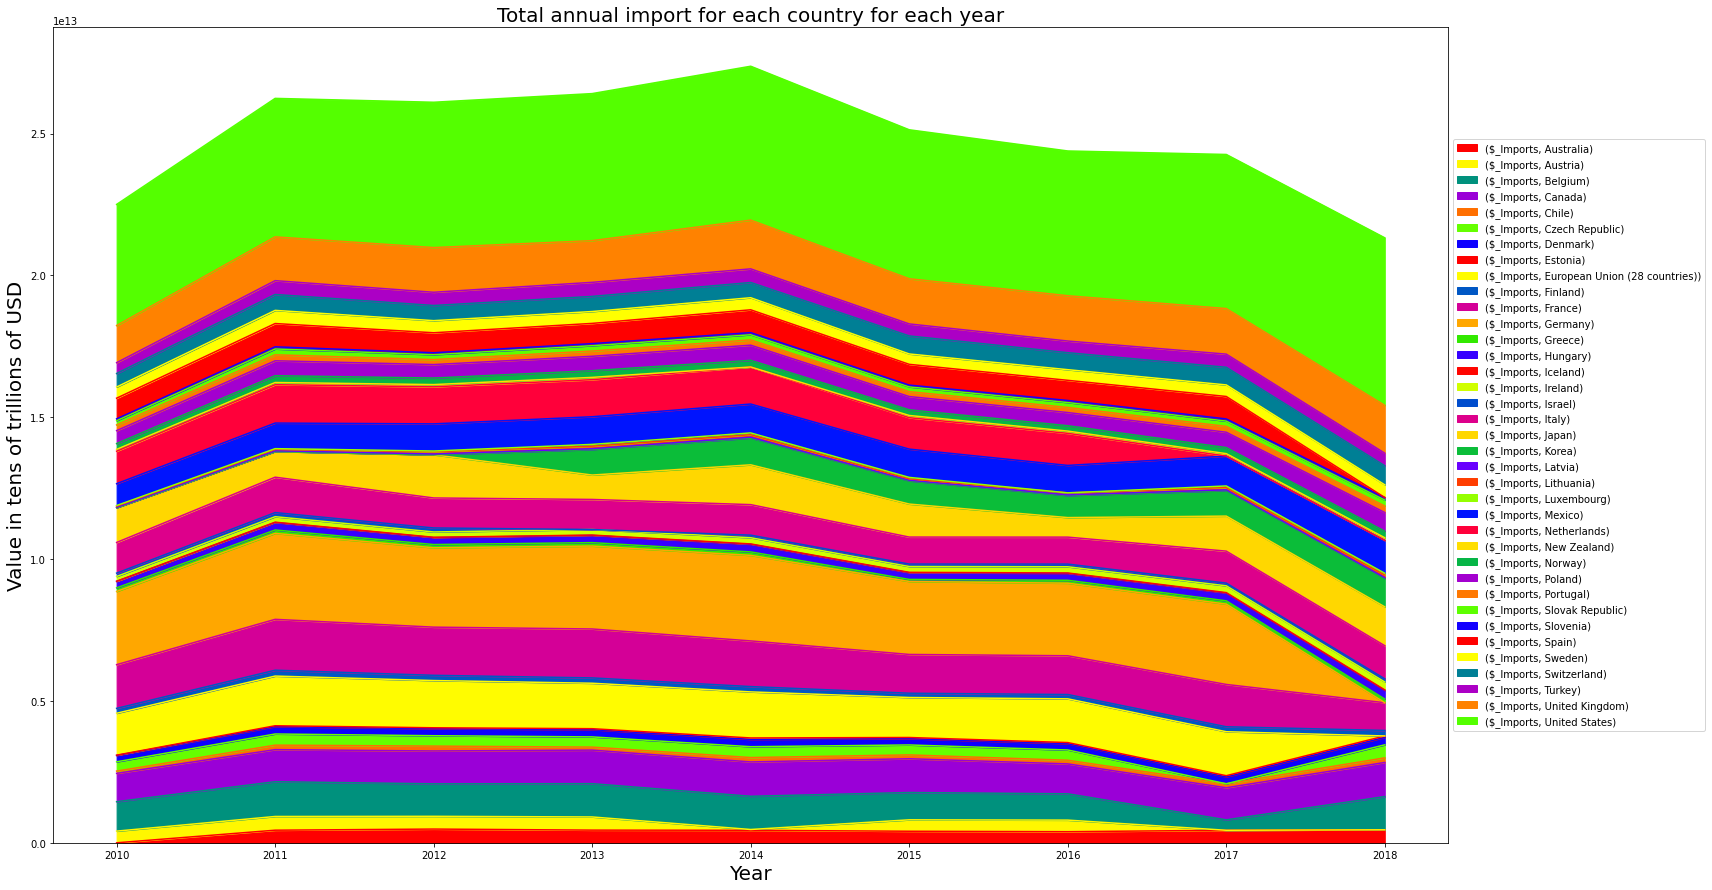

In [30]:
Pivot3.plot(kind = "area", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Value in tens of trillions of USD", fontsize = 20)
plt.title("Total annual import for each country for each year", fontsize = 20)

Text(0.5, 1.0, 'Total annual import for each country for each year')

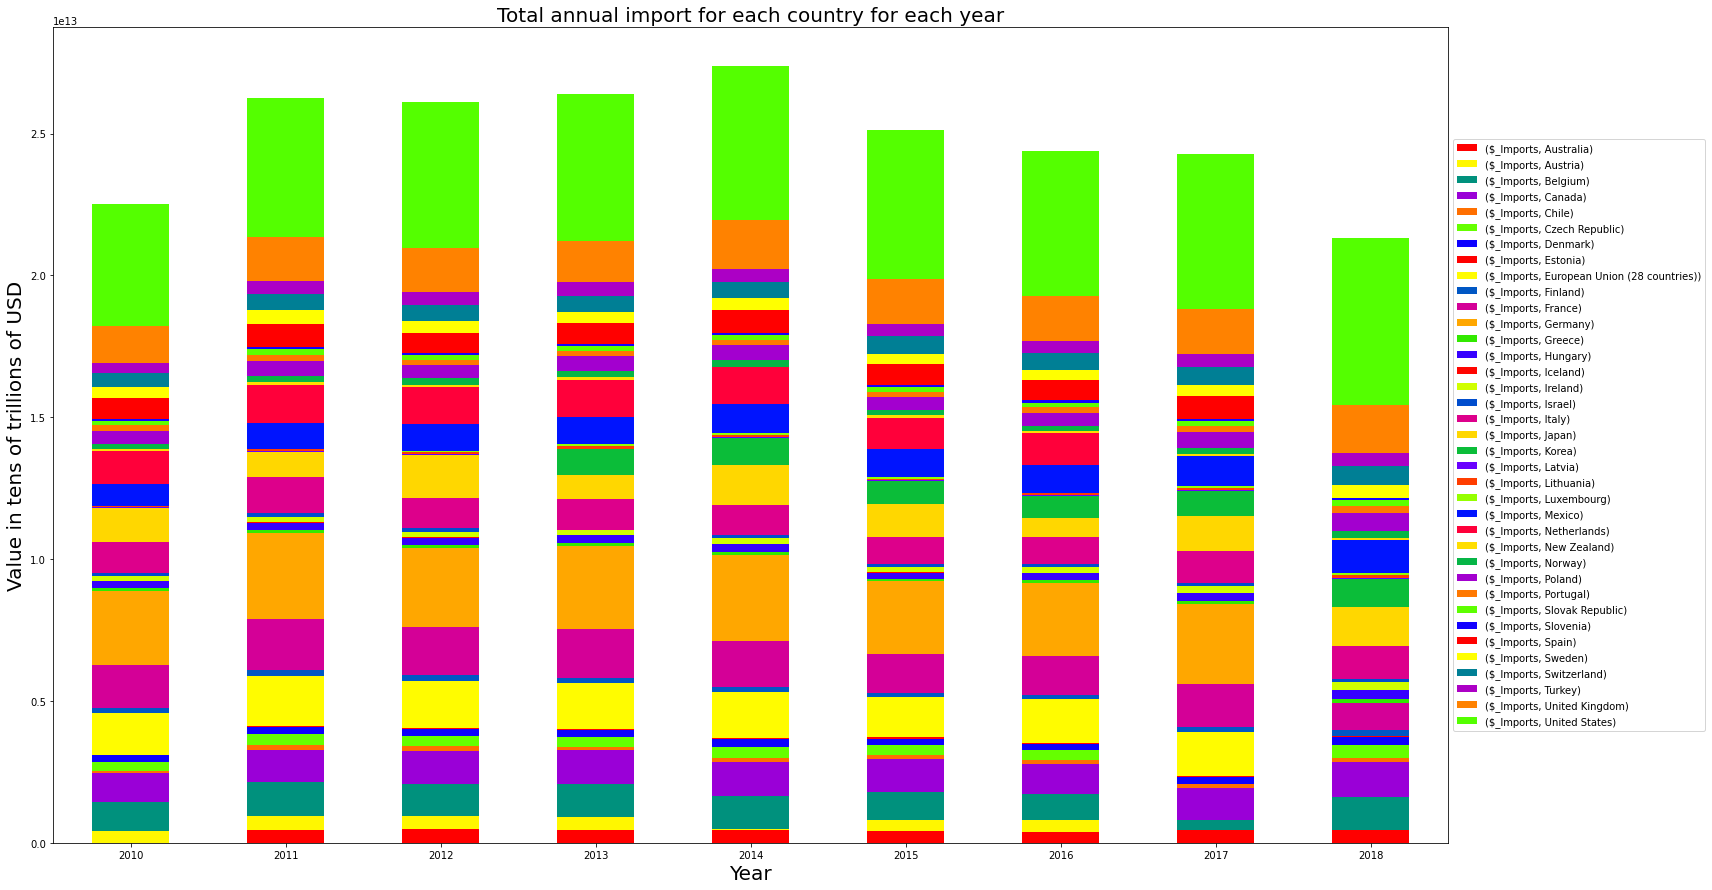

In [31]:
Pivot3.plot(kind = "bar", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Value in tens of trillions of USD", fontsize = 20)
plt.title("Total annual import for each country for each year", fontsize = 20)

In [32]:
Imp1 = Imp.groupby(["Reporter country", "TIME"], as_index = False).sum()
Imp2 = Imp.groupby(["TIME"], as_index = False).sum()
Imp3 = pd.merge(Imp1, Imp2, on = ["TIME"], how = "left")
Imp3["%_Imports"] = 100 * (Imp3["$_Imports_x"] / Imp3["$_Imports_y"])
Imp3 = Imp3[["Reporter country", "TIME", "%_Imports"]]
Imp3

,Reporter country,TIME,%_Imports
0,Australia,2011,1.694218
1,Australia,2012,1.854499
2,Australia,2013,1.692843
3,Australia,2014,1.611475
4,Australia,2015,1.620081
...,...,...,...
313,United States,2014,19.814814
314,United States,2015,20.891123
315,United States,2016,20.924616
316,United States,2017,22.391895


Text(0.5, 1.0, 'Percentage share of total imports for each country for each year')

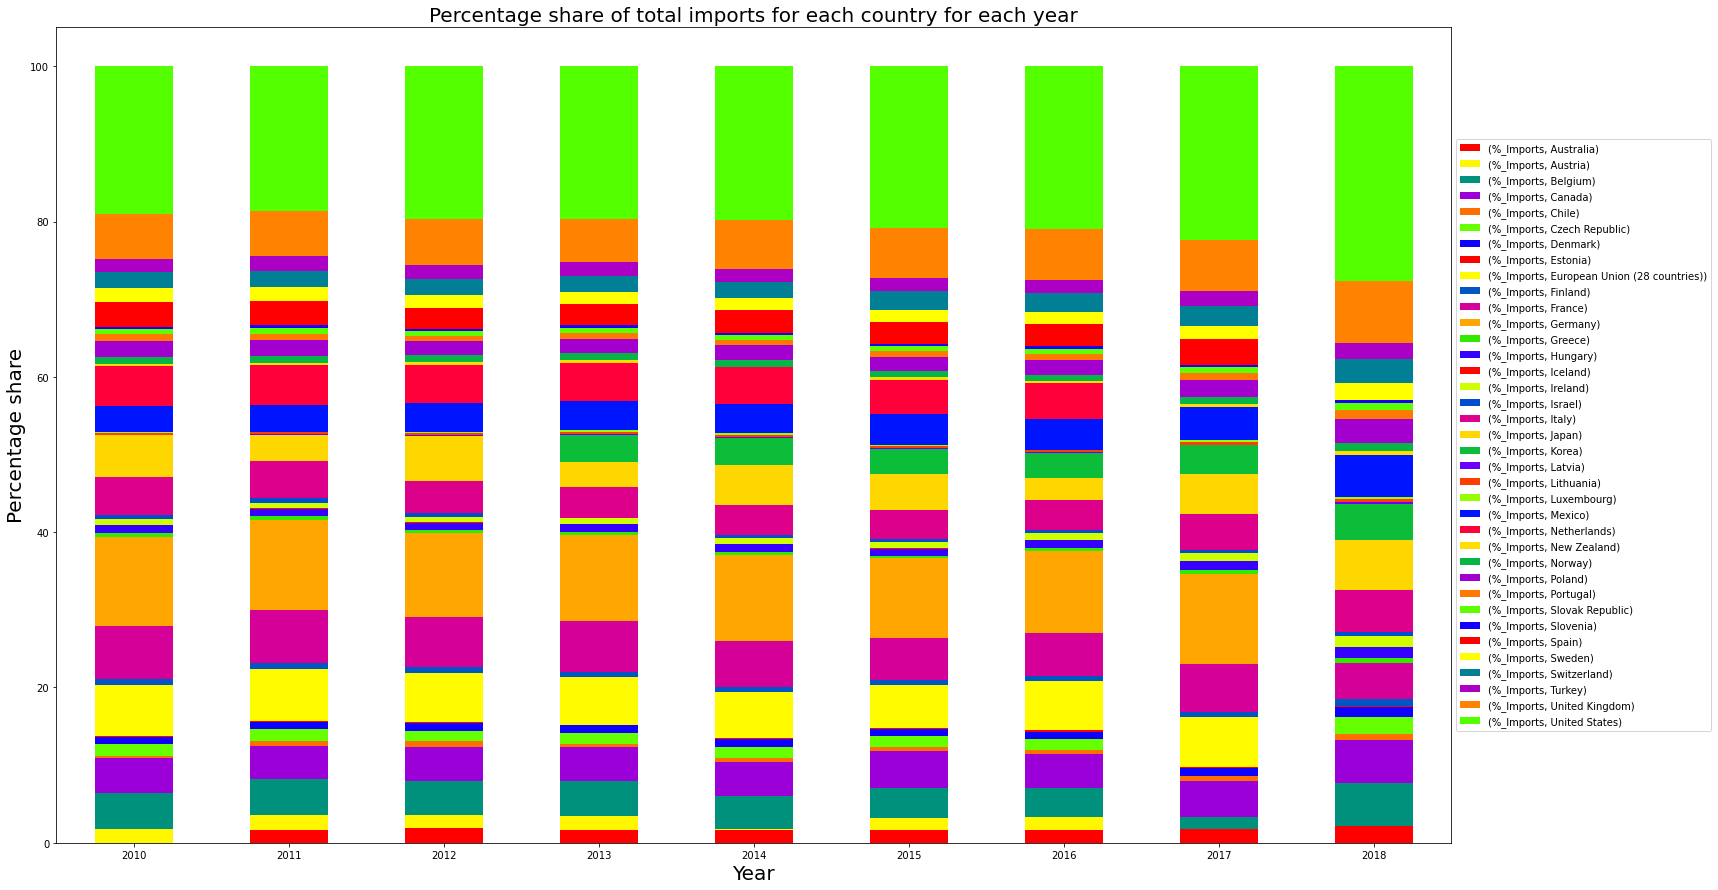

In [33]:
Pivot4 = Imp3.pivot_table(index = "TIME", columns = "Reporter country")
Pivot4.plot(kind = "bar", stacked = True, rot = 0, figsize = (25,15), colormap = "prism")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Percentage share", fontsize = 20)
plt.title("Percentage share of total imports for each country for each year", fontsize = 20)